#### Dados Originais: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

#### Para essa previção não será usado um único modelo, mas sim a junção de um modelo Random Forest, de Regressão Logística, e, por fim, de Rede Neural Profunda. O resultado final será obtido da seguinte forma:


#### **Prev_Cancer = (fscore_random_forest * prev_random_forest + fscore_logistic_regression * prev_logistic_regression + fscore_neural_network * prev_neural_network) / (fscore_random_forest + fscore_logistic_regression +  fscore_neural_network)**

#### Após isso, é escolhido o melhor threshold (assim como nos modelos de rede neural e logistica regressiva), para transformar Prev_Cancer em 0s e 1s (benigno ou maligno, respectivamente).


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, regularizers
from sklearn.metrics import roc_curve, auc


In [2]:
!unzip Dataset.zip

Archive:  Dataset.zip
  inflating: data.csv                


In [31]:
Data =  pd.read_csv("data.csv")

In [32]:
Data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [33]:
Data = Data.iloc[:, :-1]
Data


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [34]:
Data.isnull().sum().sum()


0

In [35]:
Data['diagnosis'] = Data['diagnosis'].map({'M': 1, 'B': 0})


In [36]:
non_numeric_columns = Data.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)


Index([], dtype='object')


In [37]:
correlation_with_diagnosis = Data.corr()['diagnosis'].sort_values(ascending=False)
print(correlation_with_diagnosis)


diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

In [38]:

threshold_correlacao = 0.2

colunas_restantes = correlation_with_diagnosis[correlation_with_diagnosis.abs() > threshold_correlacao].index

Data = Data[colunas_restantes]

print(Data.columns)


Index(['diagnosis', 'concave points_worst', 'perimeter_worst',
       'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst',
       'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst',
       'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se',
       'area_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst',
       'texture_mean', 'concave points_se', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_worst', 'compactness_se', 'concavity_se'],
      dtype='object')


#### Replicação de dados (desbalanceamento entre diagnósticos malignos e benignos)

In [39]:
data_B = Data[Data['diagnosis'] == 0]
data_M = Data[Data['diagnosis'] == 1]

num_rows_needed = max(len(data_B), len(data_M))
num_rows_B = len(data_B)
num_rows_M = len(data_M)

if num_rows_B < num_rows_needed:

    num_rows_B_to_add = num_rows_needed - num_rows_B
    data_B_replicated = data_B.sample(n=num_rows_B_to_add, replace=True)
    data_B_replicated['diagnosis'] = 0
    data_B = pd.concat([data_B, data_B_replicated])
elif num_rows_M < num_rows_needed:

    num_rows_M_to_add = num_rows_needed - num_rows_M
    data_M_replicated = data_M.sample(n=num_rows_M_to_add, replace=True)
    data_M_replicated['diagnosis'] = 1
    data_M = pd.concat([data_M, data_M_replicated])

balanced_data = pd.concat([data_B, data_M])

print(balanced_data['diagnosis'].value_counts())

balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)

Data = balanced_data


diagnosis
0    357
1    357
Name: count, dtype: int64


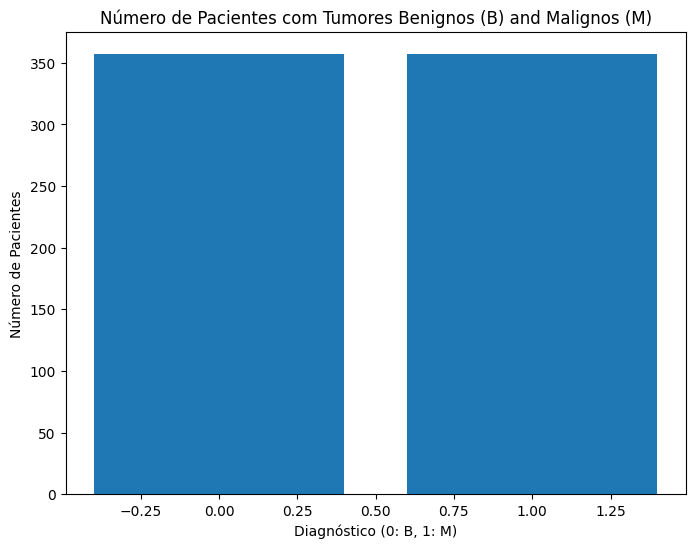

In [40]:

diagnosis_counts = Data['diagnosis'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(diagnosis_counts.index, diagnosis_counts.values)
plt.xlabel('Diagnóstico (0: B, 1: M)')
plt.ylabel('Número de Pacientes')
plt.title('Número de Pacientes com Tumores Benignos (B) and Malignos (M)')
plt.show()


In [41]:

X = Data.drop('diagnosis', axis=1)
y = Data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [42]:
thresholds = np.arange(0.1, 1.0, 0.01)

#### Random Forest

In [43]:
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='f1')

grid_search.fit(X_train, y_train)

print("Melhores parâmetros:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Melhores parâmetros: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [44]:
y_pred_rf = best_rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_rf)

print(f"Acurácia: {accuracy_rf}")
print(f"Precisão: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-Score: {f1_rf}")
print(f"ROC AUC: {roc_auc}")


Acurácia: 0.972027972027972
Precisão: 0.9552238805970149
Recall: 0.9846153846153847
F1-Score: 0.9696969696969697
ROC AUC: 0.9730769230769232


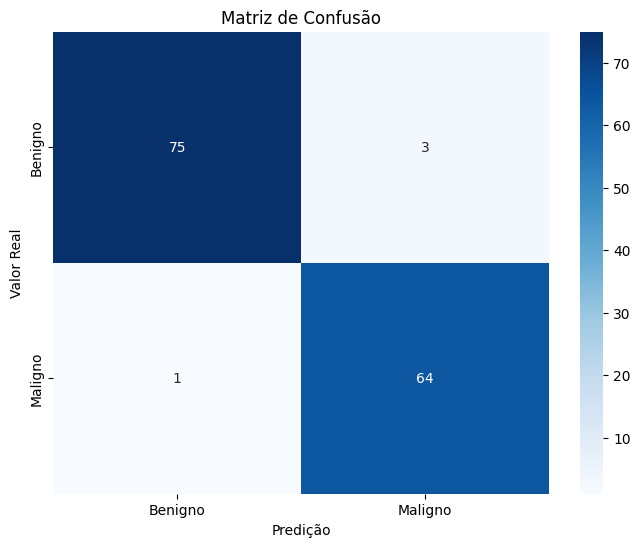

In [45]:

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno', 'Maligno'],
            yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()


#### Rede Neural Profunda

In [46]:
neural_network_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation='sigmoid')
])

neural_network_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = neural_network_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.3)

loss, accuracy = neural_network_model.evaluate(X_test, y_test)


y_pred =  neural_network_model.predict(X_test)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7026 - loss: 1.5673 - val_accuracy: 0.8953 - val_loss: 1.3572
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9048 - loss: 1.3251 - val_accuracy: 0.9128 - val_loss: 1.1787
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9509 - loss: 1.1300 - val_accuracy: 0.9244 - val_loss: 1.0454
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9652 - loss: 1.0105 - val_accuracy: 0.9593 - val_loss: 0.9373
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9585 - loss: 0.9229 - val_accuracy: 0.9651 - val_loss: 0.8503
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9638 - loss: 0.8614 - val_accuracy: 0.9709 - val_loss: 0.7784
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9719 - loss: 0.7875 - val_accuracy: 0.9709 - val_loss: 0.7168
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9761 - loss: 0.7156 - val_accuracy: 0.9767 - val_loss: 0.6584
Ep

Melhor Threshold (Max F1-Score): 0.69


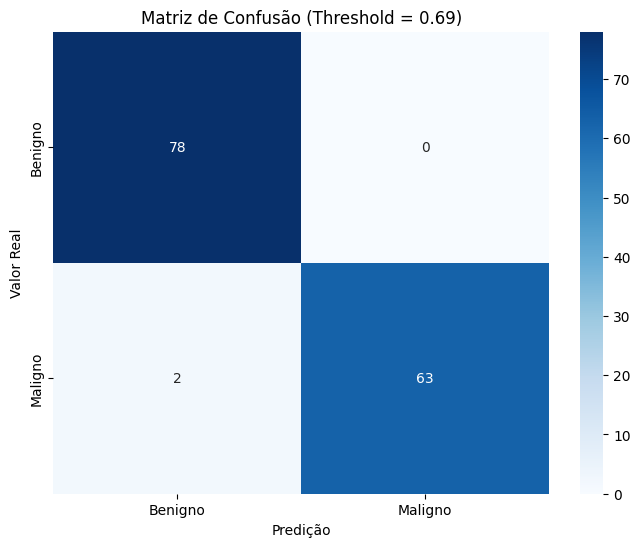

In [47]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

for threshold in thresholds:
    y_pred_threshold = (y_pred > threshold).astype("int32")

    accuracy = accuracy_score(y_test, y_pred_threshold)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    roc_auc = roc_auc_score(y_test, y_pred_threshold)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)



best_threshold = thresholds[np.argmax(f1_list)]
print(f"Melhor Threshold (Max F1-Score): {best_threshold:.2f}")

y_pred_best_threshold_neural_network = (y_pred > best_threshold).astype("int32")

cm_best_threshold = confusion_matrix(y_test, y_pred_best_threshold_neural_network)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_threshold, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno', 'Maligno'],
            yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.title(f'Matriz de Confusão (Threshold = {best_threshold:.2f})')
plt.show()

In [48]:
accuracy_nn = accuracy_score(y_test, y_pred_best_threshold_neural_network)
recall_nn = recall_score(y_test, y_pred_best_threshold_neural_network)
f1_nn = f1_score(y_test, y_pred_best_threshold_neural_network)


print(f"Acurácia: {accuracy_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")
print(f"F1-Score: {f1_nn:.4f}")

Acurácia: 0.9860
Recall: 0.9692
F1-Score: 0.9844


#### Regressão Logística

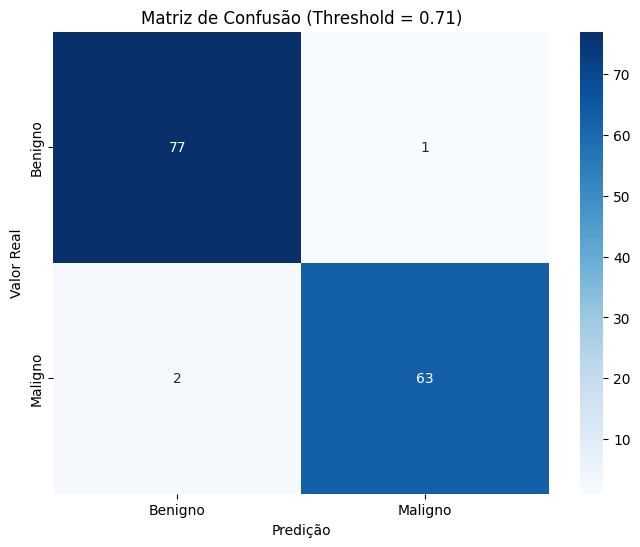

Melhor Threshold: 0.71
Acurácia: 0.9790
Recall: 0.9692
F1-Score: 0.9767


In [49]:

logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

y_pred_prob = logistic_regression_model.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 1.0, 0.01)
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_prob > threshold).astype("int32")

    accuracy_list.append(accuracy_score(y_test, y_pred_threshold))
    precision_list.append(precision_score(y_test, y_pred_threshold))
    recall_list.append(recall_score(y_test, y_pred_threshold))
    f1_list.append(f1_score(y_test, y_pred_threshold))
    roc_auc_list.append(roc_auc_score(y_test, y_pred_threshold))

best_threshold = thresholds[np.argmax(f1_list)]
y_pred_best_threshold_logistic = (y_pred_prob > best_threshold).astype("int32")
cm_logistic = confusion_matrix(y_test, y_pred_best_threshold_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno', 'Maligno'],
            yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.title(f'Matriz de Confusão (Threshold = {best_threshold:.2f})')
plt.show()

accuracy_logistic = accuracy_score(y_test, y_pred_best_threshold_logistic)
recall_logistic = recall_score(y_test, y_pred_best_threshold_logistic)
f1_logistic = f1_score(y_test, y_pred_best_threshold_logistic)

print(f"Melhor Threshold: {best_threshold:.2f}")
print(f"Acurácia: {accuracy_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")
print(f"F1-Score: {f1_logistic:.4f}")


#### Comitê de Análise Colaborativa

In [50]:

def combine_predictions(y_pred_rf, y_pred_logistic, y_pred_nn, f1_rf, f1_logistic, f1_nn):

    y_pred_rf = np.array(y_pred_rf)
    y_pred_logistic = np.array(y_pred_logistic)
    y_pred_nn = np.array(y_pred_nn)

    total_f1 = f1_rf + f1_logistic + f1_nn

    rf = y_pred_rf * f1_rf
    logistic = y_pred_logistic * f1_logistic
    nn = y_pred_nn * f1_nn
    empty_total = np.empty_like(rf)

    for element in range(len(rf)):
      empty_total[element] = rf[element] + logistic[element] + nn[element]



    return empty_total

y_pred_comitte = combine_predictions(y_pred_rf, y_pred_best_threshold_logistic, y_pred_best_threshold_neural_network, f1_rf, f1_logistic, f1_nn)



<ipython-input-50-9fd8dab15fe0>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  empty_total[element] = rf[element] + logistic[element] + nn[element]


In [51]:
f1_scores = []

for threshold in thresholds:
    y_pred_thresholded = (y_pred_comitte >= threshold).astype(int)

    f1 = f1_score(y_test, y_pred_thresholded)
    f1_scores.append(f1)

best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

y_pred_best = (y_pred_comitte >= best_threshold).astype(int)
best_accuracy = accuracy_score(y_test, y_pred_best)
best_precision = precision_score(y_test, y_pred_best)
best_recall  =  recall_score(y_test, y_pred_best)
print(f'Melhor Threshold: {best_threshold:.2f}')
print(f'Acurácia: {best_accuracy:.4f}')
print(f'Recall: {best_recall:.4f}')
print(f'Precisão: {best_precision:.4f}')
print(f'F1 Score: {best_f1_score:.4f}')


Melhor Threshold: 0.98
Acurácia: 0.9860
Recall: 0.9692
Precisão: 1.0000
F1 Score: 0.9844


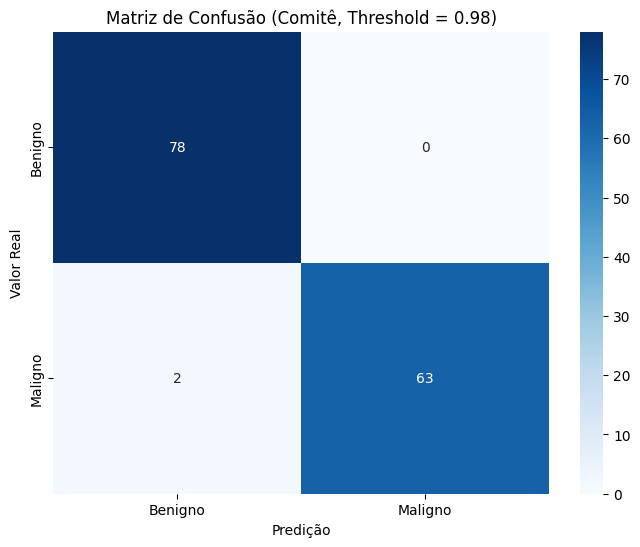

In [52]:
cm_comitte = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_comitte, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno', 'Maligno'],
            yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.title(f'Matriz de Confusão (Comitê, Threshold = {best_threshold:.2f})')
plt.show()


#### Na medicina, é melhor um falso positivo do que um falso negativo. Um tumor benigno classificado como maligno tecnicamente é melhor do que um tumor maligno classificado como maligno.

#### Em conclusão, o modelo apresentou ótimas métricas para um classificador de câncer de mama. Podemos ver isso analisando a sua Curva ROC.

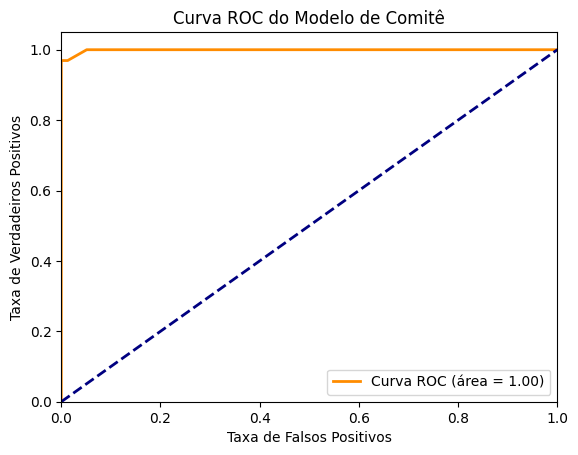

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_comitte)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC do Modelo de Comitê')
plt.legend(loc="lower right")
plt.show()


In [53]:
import pickle

pickle.dump(best_rf_model, open('melhor_modelo_random_forest.sav', 'wb'))

pickle.dump(logistic_regression_model, open("melhor_modelo_regressao_logistica.sav", 'wb'))

neural_network_model.save('melhor_modelo_rede_neural.h5')
